# Python Web Scraper and Import to Pandas DataFrame for Visualization with MatPlotLib

This script uses the BeautifulSoup module to scrape financial information from FinViz.com. Daily financial information is gathered on the latest 'most volatile' stocks and imputed to a Pandas DataFrame. Matplotlib is used to visualize the data to help identify trends. 

In [170]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
#import psycopg2
import decimal
D = decimal.Decimal
import matplotlib.pyplot as plt

base_url = 'http://finviz.com/screener.ashx?v=152&s=ta_topgainers&o=price&c=0,1,2,3,4,5,6,24,25,30,63,65,66,67'
html = requests.get(base_url)
soup = BeautifulSoup(html.content, "html.parser")
rows = soup.find_all('tr', class_=["table-dark-row-cp", "table-light-row-cp"])
id_=[]
ticker=[]
co=[]
sect =[]
ind=[]
cntry=[]
m_cap=[]
out=[]
flt_=[] 
f_short=[]
avg_v=[]
prc=[]
chg=[]
vol=[]

for row in rows:
    columns = row.find_all('td')
    id_.append(columns[0].a.get_text())
df = pd.DataFrame(index=id_)
for row in rows:
    columns = row.find_all('td')
    tick = columns[1].a.get_text()
    ticker.append(tick)
df['ticker'] = ticker
for row in rows:
    columns = row.find_all('td')
    company = columns[2].a.get_text()
    co.append(company)
df['company'] = co
for row in rows:
    columns = row.find_all('td')
    sector = columns[3].a.get_text()
    sect.append(sector)
df['sector'] = sect
for row in rows:
    columns = row.find_all('td')    
    industry = columns[4].a.get_text()
    ind.append(industry)
df['industry'] = ind
for row in rows:
    columns = row.find_all('td')    
    country = columns[5].a.get_text()
    cntry.append(country)
df['country'] = cntry
#print(df)
for row in rows:
    columns = row.find_all('td')
    market_cap = columns[6].a.get_text()
    if market_cap.endswith('M'):
        market_cap = market_cap[:-1]
        market_cap = float(market_cap) * 1000000
        m_cap.append(market_cap)
    
    elif market_cap.endswith('B'):
        market_cap = market_cap.strip('B')
        market_cap = float(market_cap)* 1000000000
        m_cap.append(market_cap)
    else:
        market_cap = market_cap.strip('K')
        market_cap = float(market_cap)*1000
        m_cap.append(market_cap)
df['market_cap'] = m_cap 
for row in rows:
    columns = row.find_all('td')        
    outstanding = columns[7].a.get_text()
    if outstanding.endswith('M'):
        outstanding = outstanding.strip('M')
        outstanding = float(outstanding)* 1000000
        out.append(outstanding)
    elif outstanding.endswith('B'):
        outstanding = outstanding.strip('B')
        outstanding = float(outstanding)* 1000000000
        out.append(outstanding)
    else:
        outstanding = outstanding.strip('K')
        outstanding = float(outstanding)*1000
        out.append(outstanding)
df['outstanding'] = out
for row in rows:
    columns = row.find_all('td')        
    float_ = columns[8].a.get_text()
    if float_.endswith('M'):
        float_ = float_.strip('M')
        float_ = float(float_)* 1000000
        flt_.append(float_)        
    elif float_.endswith('-'):    
        float_ = 'NaN'
        flt_.append(float_)        
    elif float_.endswith('B'):
        float_ = float_.strip('B')
        float_ = float(float_)* 1000000000
        flt_.append(float_)        
    else:
        float_ = float_.strip('K')
        float_ = float(float_)*1000
        flt_.append(float_)
df['float'] = flt_       
for row in rows:
    columns = row.find_all('td')        
    float_short = columns[9].a.get_text()
    if float_short.endswith('%'):
        float_short = float_short.replace('%', '')
        f_short.append(float_short)
    elif float_short.endswith('-'):
        float_short = 'NaN'
        f_short.append(float_short)
    else:    
        float_short = float(float_short)
        f_short.append(float_short)
df['float_short'] = f_short
for row in rows:
    columns = row.find_all('td')
    avg_volume = columns[10].a.get_text()
    if avg_volume.endswith('M'):
        avg_volume = avg_volume.strip('M')
        avg_volume = float(avg_volume)* 1000000
        avg_v.append(avg_volume)
    else:
        avg_volume = avg_volume.strip('K')
        avg_volume = float(avg_volume)*1000
        avg_v.append(avg_volume)
df['avg_volume'] = avg_v
for row in rows:
    columns = row.find_all('td')
    price = columns[11].a.get_text()
    prc.append(price)
df['price'] = prc
for row in rows:
    columns = row.find_all('td')
    change = columns[12].a.get_text()
    change = change.replace('%','')
    chg.append(change)
df['change'] = chg   
for row in rows:
    columns = row.find_all('td')
    volume = columns[13].a.get_text()
    volume = volume.replace(',', '')
    vol.append(volume)
df['volume'] = vol
#    store (ticker, company, sector, industry, country, market_cap, outstanding, float_, float_short, avg_volume, price, change, volume)
#df.fillna(df.mean())
#print(df.head())
df.describe(include ='all')
#df.mean(skipna=False)    

,ticker,company,sector,industry,country,market_cap,outstanding,float,float_short,avg_volume,price,change,volume
count,20,20,20,20,20,2.000000e+01,2.000000e+01,20,20,2.000000e+01,20,20,20
unique,20,20,7,16,5,NaN,NaN,19,18,NaN,18,18,20
top,CGG,"Biostar Pharmaceuticals, Inc.",Healthcare,Semiconductor- Memory Chips,USA,NaN,NaN,NaN,3.59,NaN,1.41,5.86,168493
freq,1,1,8,2,15,NaN,NaN,2,2,NaN,2,2,1
mean,NaN,NaN,NaN,NaN,NaN,1.086720e+09,2.147075e+08,NaN,NaN,1.626256e+06,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,4.546553e+09,8.464354e+08,NaN,NaN,4.036950e+06,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,5.310000e+06,1.050000e+06,NaN,NaN,8.980000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.957250e+07,8.187500e+06,NaN,NaN,7.935250e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.166000e+07,2.871500e+07,NaN,NaN,3.241000e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.114300e+08,4.105000e+07,NaN,NaN,6.990100e+05,NaN,NaN,NaN


## MatPlotlib Visualization of Most Active Sectors

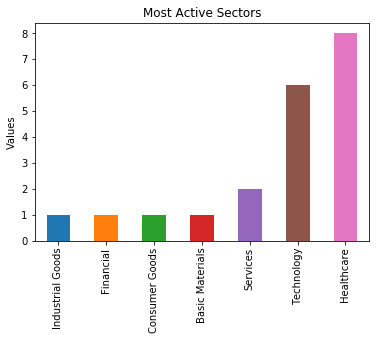

In [138]:
df.sector.value_counts().sort_values().plot(kind = "bar")
plt.ylabel('Values');
plt.title('Most Active Sectors');

## MatPlotLib Visualization of Most Active Sector by Average Volume of Shares Traded

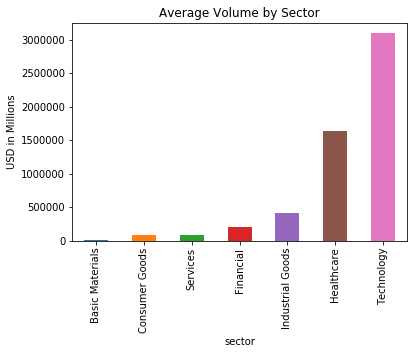

In [139]:
df.groupby('sector').avg_volume.mean().sort_values().plot(kind= "bar");
plt.ylabel('USD in Millions')
plt.title('Average Volume by Sector');

## MatPlotLib Visualization of Company Worth by Market Cap

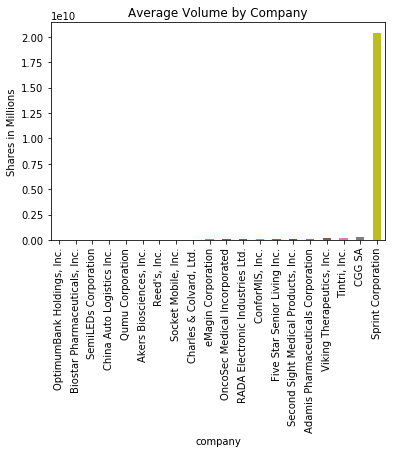

In [176]:
df.groupby('company').market_cap.mean().sort_values().plot(kind= "bar");
plt.ylabel('Millions of Do')
plt.title('Average Value by Company');